<a href="https://colab.research.google.com/github/KirtanaAryasomyajula/Project-Portfolio/blob/main/ConcreteStrengthPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONCRETE STRENGTH PREDICTION**

**Objective:** To predict the strength of concrete for construction purposes based on composition and weightage of  materials like Cement,Blastfurnaceslag,fly ash,water,etc.
This dataset is taken from kaggle .

Concrete Strength depends on the mix composition and curing age.

Regression Analysis: Predict Concrete Strength based on mix proportions.

Optimization: Identify the best mix for maximum strength.

**Dataset features:**  

Cement: 	Amount of cement in kg/m³ used in the concrete mix.

Blast_Furnance_Slag:	Amount of blast furnace slag (a by-product of steel production) in kg/m³.

Fly_Ash:	Amount of fly ash (a by-product of coal combustion) in kg/m³.

Water:	Amount of water in kg/m³ used in the mix.

Superplasticizer: Amount of superplasticizer (chemical admixture to improve workability) in kg/m³.

Coarse_Aggregate:		Amount of coarse aggregate (gravel/stones) in kg/m³.

Fine_Aggregate:		Amount of fine aggregate (sand) in kg/m³.

Age_Day: 	Age of concrete in days (time for curing).

**Importing required dataset and libraries**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('/content/Concrete Compressive Strength.csv')

**Inspecting the features and their datatypes.**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   Blast_Furnance_Slag  1030 non-null   float64
 2   Fly_Ash              1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   Coarse_Aggregate     1030 non-null   float64
 6   Fine_Aggregate       1030 non-null   float64
 7   Age_Day              1030 non-null   int64  
 8   Concrete_Strength    1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


**Inspecting the first 5 rows**

**Target Variable: Concrete Strength(numeric)**

In [89]:
df.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


**Checking the summary values of  features(all the features are numerical)**

In [90]:
df.describe()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day,Concrete_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


**Checking for null values**

In [91]:
df.isnull().sum()

,0
Cement,0
Blast_Furnance_Slag,0
Fly_Ash,0
Water,0
Superplasticizer,0
Coarse_Aggregate,0
Fine_Aggregate,0
Age_Day,0
Concrete_Strength,0


# **EDA**

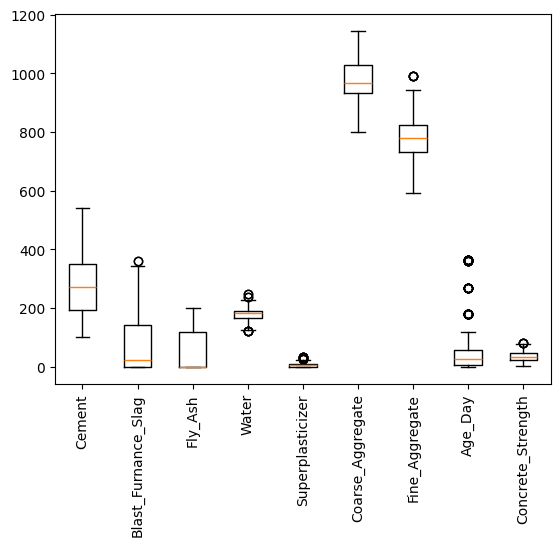

In [92]:
plt.boxplot(df,tick_labels=df.columns)
plt.xticks(rotation=90)
plt.show()

**Checking the diatribution of target variable**

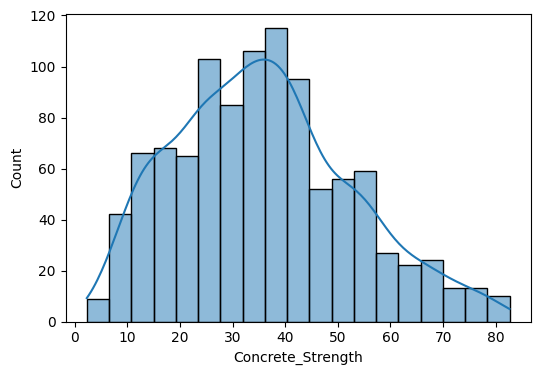

In [93]:
plt.figure(figsize=(6,4))
sns.histplot(df['Concrete_Strength'],kde=True)
plt.show()

The target variable seems to be almost normally distributed without outliers.

**Checking the distribution of independent features**

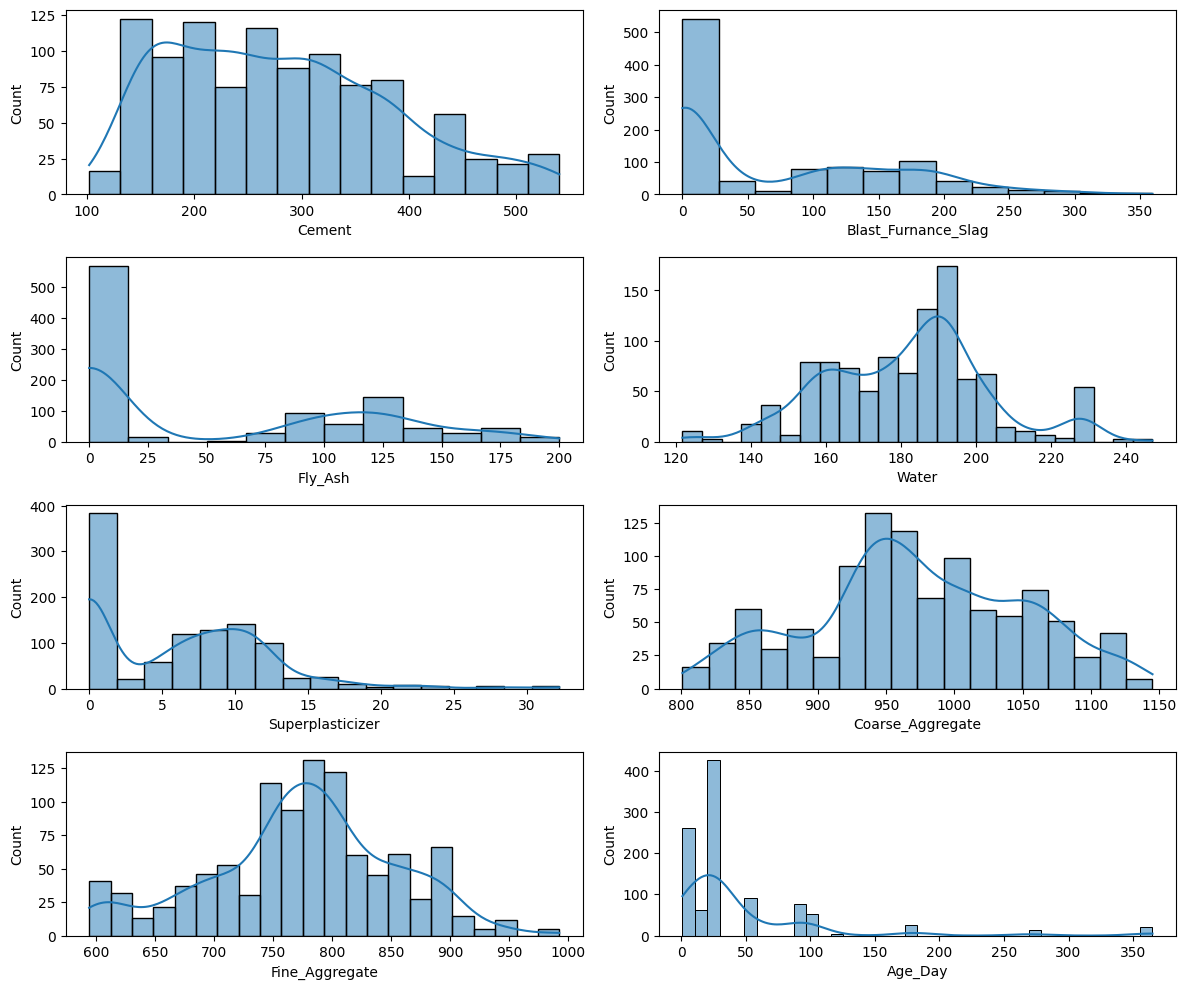

In [94]:
fig,axes=plt.subplots(figsize=(12,10),nrows=4,ncols=2)

axes = axes.flatten()

for i in range(8):
    sns.histplot(df,x=df.columns[i],ax=axes[i],kde=True)
    axes[i].set_xlabel(f"{df.columns[i]}")
plt.tight_layout()
plt.show()

There are outliers in the features, but their removal may not give better results.So instead of removing or treating them, we can go for robust scaling technique while doing features scaling.

**Checking the relation between independent features and target variable**

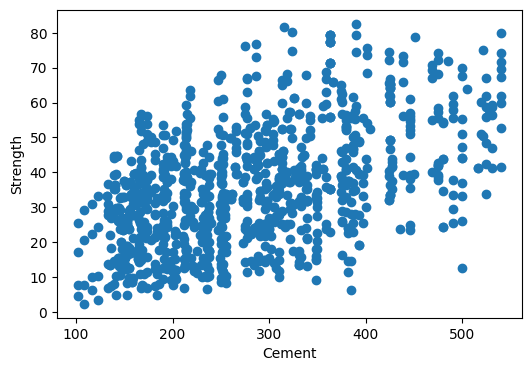

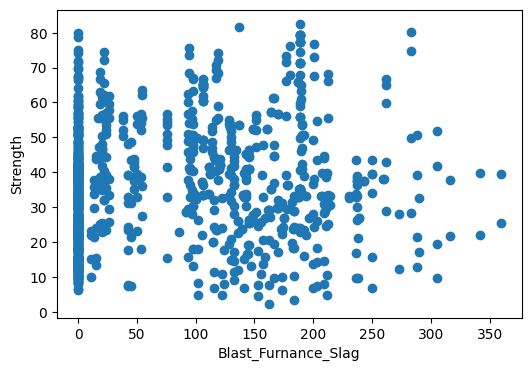

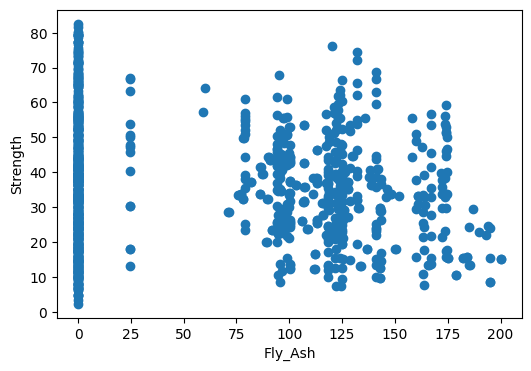

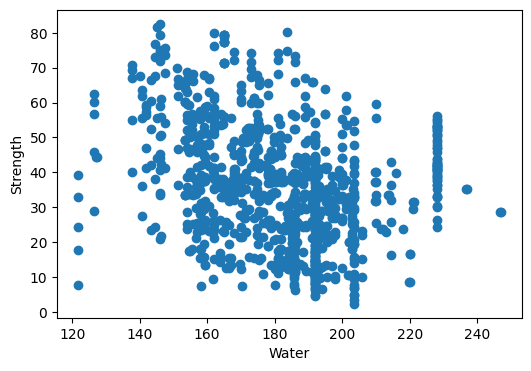

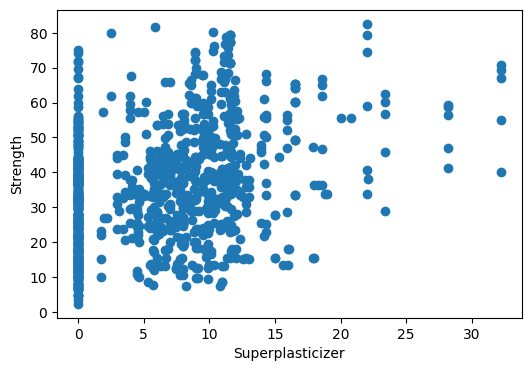

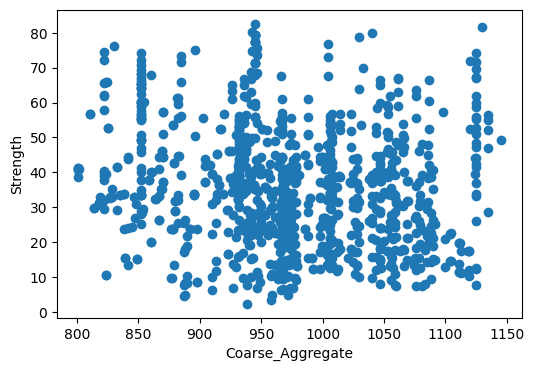

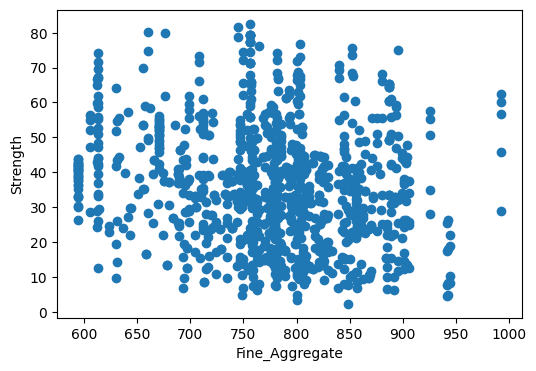

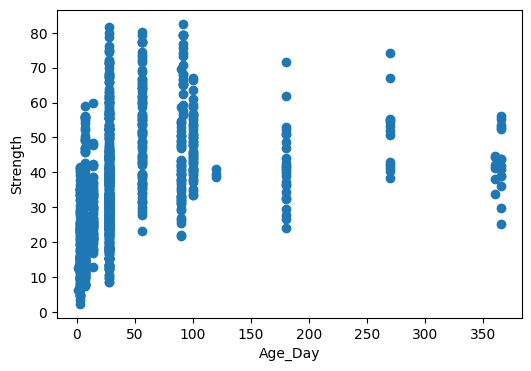

In [95]:
for column in df.drop(columns=['Concrete_Strength']).columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df[column],df['Concrete_Strength'])
    plt.xlabel(column)
    plt.ylabel('Strength')
    plt.show()

**Checking for correlation**

<Axes: >

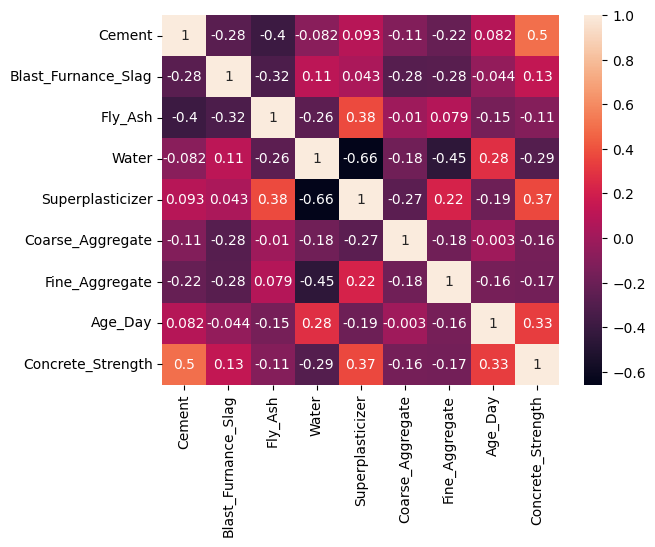

In [96]:
sns.heatmap(data=df.corr(),annot=True)

We can remove the features Flyash,coarse and fine aggrgates as there is a less negative correlation with target variable concrete strength.But keeping or omitting them doesn't effect twhen using randomforest algorithm but may show some effect while fitting a linear regression model. So let us fit both the models with and without omitting the 3  features and compare the accuracy after which we use the best model for deployment purpose.

In [97]:
#   new dataframe with omiting features
df_new = df.drop(columns={'Fly_Ash','Coarse_Aggregate','Fine_Aggregate'})

# **Feature Scaling**

Since there are outliers in the data, we can go for robust scaling .Also we are scaling for both dataframes,i.e, dataframe with and without features like flyash,coarse and fine aggregates.

We will be referring the dataframes as:

dataframe with all features: model_1

3 features omitted dataframe: model_2

In [98]:

from sklearn.preprocessing import RobustScaler

target = 'Concrete_Strength'
scaler = RobustScaler()
# model_1
feature_columns = [col for col in df.columns if col != target]
df[feature_columns] = scaler.fit_transform(df[feature_columns])
#  model_2
feature_columns = [col for col in df_new.columns if col != target]
df_new[feature_columns] = scaler.fit_transform(df_new[feature_columns])

In [99]:
# model_1
df.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day,Concrete_Strength
0,1.694528,-0.153900,0.0,-0.848708,-0.378937,0.739220,-1.112413,0.000000,79.986111
1,1.694528,-0.153900,0.0,-0.848708,-0.378937,0.893224,-1.112413,0.000000,61.887366
2,0.378113,0.842952,0.0,1.586716,-0.625000,-0.369610,-1.993659,4.938776,40.269535
3,0.378113,0.842952,0.0,1.586716,-0.625000,-0.369610,-1.993659,6.877551,41.052780
4,-0.471372,0.772298,0.0,0.258303,-0.625000,0.106776,0.494250,6.775510,44.296075


In [100]:
# model_2
df_new.head()

,Cement,Blast_Furnance_Slag,Water,Superplasticizer,Age_Day,Concrete_Strength
0,1.694528,-0.153900,-0.848708,-0.378937,0.000000,79.986111
1,1.694528,-0.153900,-0.848708,-0.378937,0.000000,61.887366
2,0.378113,0.842952,1.586716,-0.625000,4.938776,40.269535
3,0.378113,0.842952,1.586716,-0.625000,6.877551,41.052780
4,-0.471372,0.772298,0.258303,-0.625000,6.775510,44.296075


In [101]:
# model_1
y = df['Concrete_Strength']
X = df.drop(columns = {'Concrete_Strength'})

In [102]:
#model_2
y_new = df_new['Concrete_Strength']
X_new = df_new.drop(columns = {'Concrete_Strength'})

# **Train-test-split**

In [103]:
from sklearn.model_selection import train_test_split
# model_1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model_2
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [104]:
# model_1
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#model_2
print(X_new_train.shape)
print(y_new_train.shape)
print(X_new_test.shape)
print(y_new_test.shape)


(824, 8)
(824,)
(206, 8)
(206,)
(824, 5)
(824,)
(206, 5)
(206,)


# **Model Fitting, Prediction and Evaluation**

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
# model_1
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('Slope',model.coef_)
print('Intercept',model.intercept_)
print('MSE',mse)

r2_score = model.score(X_test,y_test)
print('Accuracy in r^2',r2_score*100)


Slope [18.7534603  15.51262087  9.71807321 -3.67779315  3.13671733  1.73414491
  2.23887986  5.70577933]
Intercept 22.324607462887545
MSE 95.9754843533771
Accuracy in r^2 62.754160554290195


In [106]:
# model_2
model.fit(X_new_train, y_new_train)

# Predictions
y_new_pred = model.predict(X_new_test)
mse = mean_squared_error(y_new_test,y_new_pred)
print('Slope',model.coef_)
print('Intercept',model.intercept_)
print('MSE',mse)

r2_score = model.score(X_new_test,y_new_test)
print('Accuracy in r^2',r2_score*100)

Slope [12.89038289  9.39392406 -5.19761802  5.95811394  5.45586752]
Intercept 29.201402564471
MSE 111.30740438229923
Accuracy in r^2 56.80420119082278


Mean Squared Error: 30.224368845184486
R² Score: 88.27062976613107


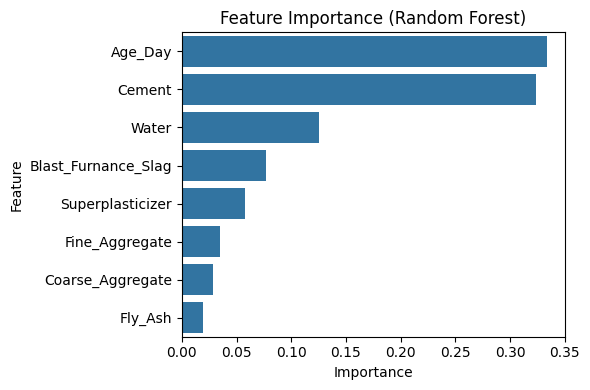

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model_1
rf.fit(X_train, y_train)

# Predict on the test set
y_predict = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error:",mse)
print("R² Score:",r2*100)

importances = rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

Here after fitting the models : Linear regression and RandomForestRegressor , we can see that the accuracy for randomforestregressor model is high(88%) than linear regression(62%).So we can proceed with randomforest model. But after inspecting the important features we can see that  the last 3 features of least importance can be omitted from the model.There are chances for increase in accuracy of the model after omitting the features : Flyash,coarseaggregate and fineaggregate.

Let us fit the model_2 which does not have the above 3 features.

Mean Squared Error: 28.098010406346123
R² Score: 89.09581971490383


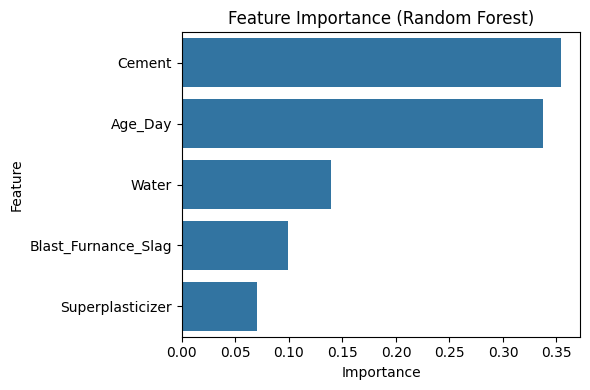

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score

rf_new = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model_2
rf_new.fit(X_new_train, y_new_train)

# Predict on the test set
y_new_predict = rf_new.predict(X_new_test)

# Evaluate the model
mse = mean_squared_error(y_new_test, y_new_predict)
r2 = r2_score(y_new_test, y_new_predict)

print("Mean Squared Error:",mse)
print("R² Score:",r2*100)

importances = rf_new.feature_importances_
feat_imp = pd.DataFrame({'Feature': X_new.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


# **Conclusion**

We can see that the randomforestregressor model after omitting the features with least importance has performed well and accuracy has increased by 1% (from 88 to 89)although this difference is not that much but still matters in solving real time projects.We can see a decrease in accuracy while fitting a linear regression model by 6%(62 to 56), which means the omitting of the features has not worked well with the model.

**Observations**

*Accuracies*

Model_1 : Linear regression(62%) and RandomForestregressor(88%)

Model_2 : Linear regression(56%) and RandomForestregressor(89%)



*Errors(MSE)*

Model_1 : Linear regression(95) and RandomForestRegressor(30)

Model_1 : Linear regression(111) and RandomForestRegressor(28)


Finally , we can conclude that the randomforest model has performed well when compared to the linear regression model in both cases,i.e with and without omitting features.
Let us predict the concrete strength for new data using model_2 of randomforestregessor.



**Prediction for new datapoint**

In [109]:
new_data = pd.DataFrame([{'Cement': 350.0,'Blast_Furnance_Slag': 50.0,'Water': 180.0,'Superplasticizer': 10.0,'Age_Day': 28}])

predicted_strength = rf_new.predict(new_data)[0]
print(f"Predicted Concrete Strength: {predicted_strength:.2f} MPa")

Predicted Concrete Strength: 66.19 MPa
